In [238]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [239]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [240]:
#crear nueva tabla con poblacion
datos["poblacion"] = datos["population"] / datos['households']
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,poblacion
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.123209


<Axes: xlabel='latitude', ylabel='longitude'>

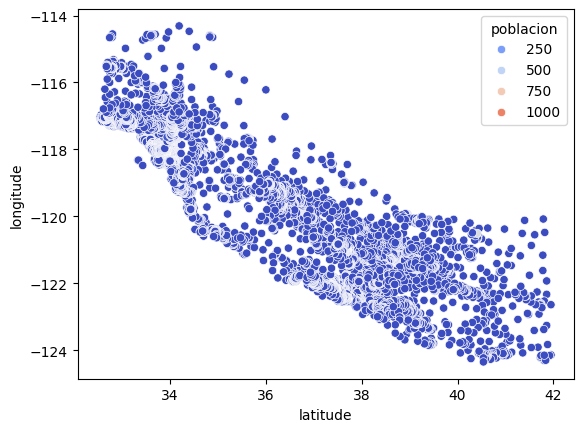

In [241]:
#grafca de mapa mediante cuant vale la casa
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="poblacion", palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

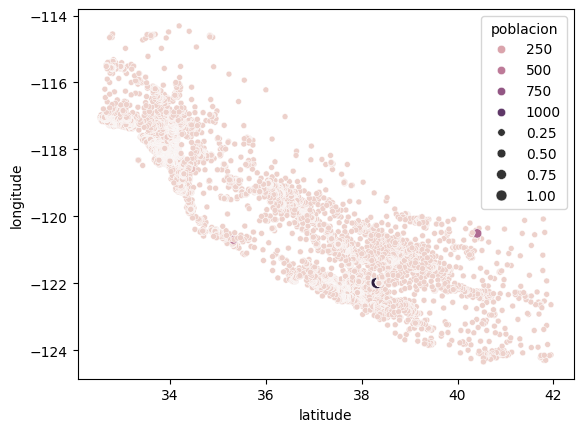

In [242]:
#grafca de mapa
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="poblacion", 
               size=datos["poblacion"]/1000)

In [243]:
datos.loc[:, ["latitude", "longitude", "poblacion"]]

,latitude,longitude,poblacion
0,37.88,-122.23,2.555556
1,37.86,-122.22,2.109842
2,37.85,-122.24,2.802260
3,37.85,-122.25,2.547945
4,37.85,-122.25,2.181467
...,...,...,...
20635,39.48,-121.09,2.560606
20636,39.49,-121.21,3.122807
20637,39.43,-121.22,2.325635
20638,39.43,-121.32,2.123209


In [244]:
from sklearn.cluster import KMeans

x = datos.loc[:, ["latitude", "longitude", "poblacion"]]
modelo = KMeans(n_clusters=15)

predicciones=modelo.fit_predict(x)

#esto ya no devuelve las predicciones

c:\Users\Miguel Angel\Desktop\TODO\PROGRAMACION\PROYECTOS EN GIT HUB\MACHINE_LEARNING\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [245]:
predicciones.shape # node deberia decir en que nivel socioeconomico queda...


(20640,)

In [246]:
x["segmento_poblacional"] = predicciones # agregar el estrato socioeconomico

In [247]:
pd.DataFrame(x)

,latitude,longitude,poblacion,segmento_poblacional
0,37.88,-122.23,2.555556,3
1,37.86,-122.22,2.109842,3
2,37.85,-122.24,2.802260,3
3,37.85,-122.25,2.547945,3
4,37.85,-122.25,2.181467,3
...,...,...,...,...
20635,39.48,-121.09,2.560606,12
20636,39.49,-121.21,3.122807,12
20637,39.43,-121.22,2.325635,12
20638,39.43,-121.32,2.123209,12


In [248]:
x["segmento_poblacional"].value_counts()

segmento_poblacional
0     4260
3     3801
13    3328
6     2050
12    1890
8     1597
7     1576
10    1529
14     566
11      35
5        4
1        1
4        1
9        1
2        1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

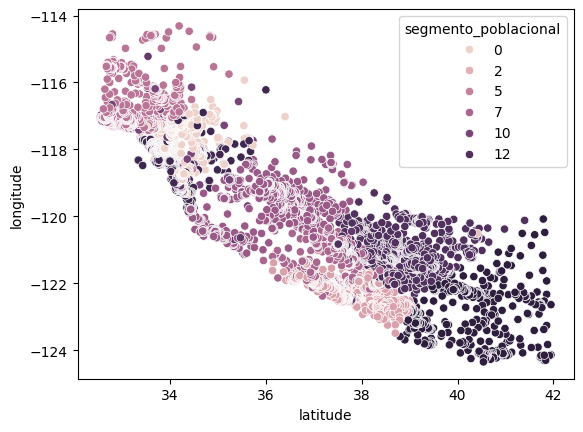

In [249]:
sb.scatterplot(x="latitude", y="longitude", data=x, hue="segmento_poblacional")

<Axes: xlabel='latitude', ylabel='longitude'>

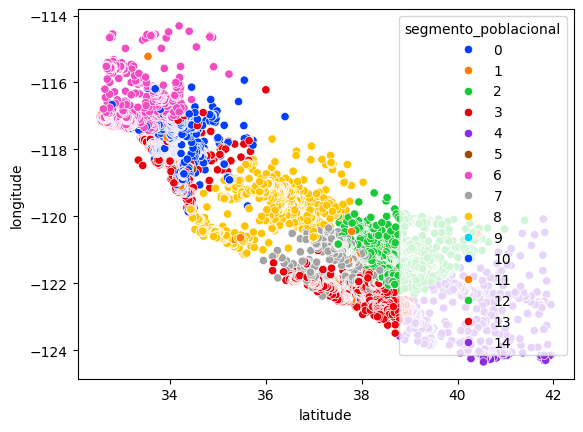

In [250]:
#neuva grafica ocn 6 estratos
sb.scatterplot(x="latitude", y="longitude", data=x, hue="segmento_poblacional", palette="bright")

In [251]:
x["segmento_poblacional"].value_counts()

segmento_poblacional
0     4260
3     3801
13    3328
6     2050
12    1890
8     1597
7     1576
10    1529
14     566
11      35
5        4
1        1
4        1
9        1
2        1
Name: count, dtype: int64

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_14564\1365480374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="segmento_poblacional", data=x, palette="bright")


<Axes: xlabel='segmento_poblacional', ylabel='count'>

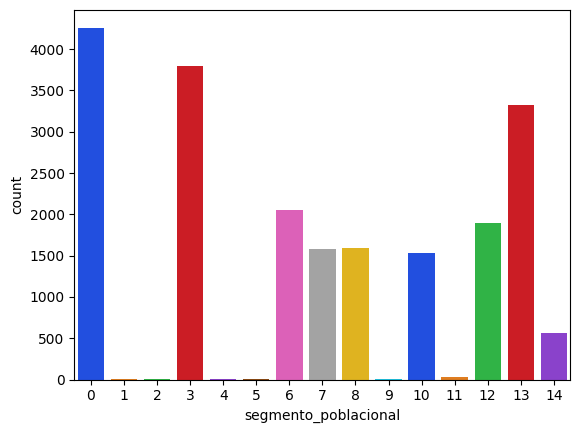

In [252]:
sb.countplot(x="segmento_poblacional", data=x, palette="bright")

In [253]:
x.groupby(["segmento_poblacional"])["poblacion"].mean() #que me calclelos ingresos medios

segmento_poblacional
0        3.189268
1      599.714286
2     1243.333333
3        2.481881
4      230.172414
5       59.883929
6        2.723271
7        3.589458
8        3.035178
9      502.461538
10       4.502408
11      14.032338
12       2.594145
13       2.310134
14       2.632426
Name: poblacion, dtype: float64